# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

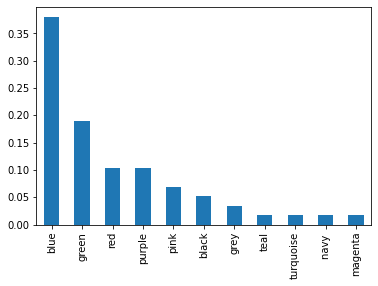

In [5]:
# TYPE YOUR CODE HERE.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

def clean_color_data(c):
  c = str(c).lower()
  if c == "gray":
    return "grey"
  elif "black" in c:
    return "black"
  elif "blue" in c:
    return "blue"
  elif "green" in c:
    return "green"
  elif "pink" in c:
    return "pink"
  else: return c

df_survey = pd.read_csv(url_1)
colors = df_survey["What is your favorite color?"].map(clean_color_data)
colors = colors.value_counts(normalize=True)
colors_copy = colors.copy(deep=True)
colors.plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.**

Blue is the most popular color among DATA 301 students, followed by green at only half the popularity. Red and Purple are next at about half of green's popularity, followed by pink, black, and the rest of the colors with marginal popularity. 

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

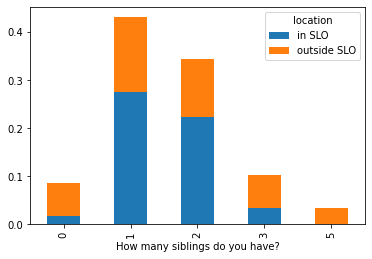

In [6]:
# TYPE YOUR CODE HERE.

# combines those who live in SLO. combines those outside of SLO
def simplify_location(c):
  c = str(c)
  if (c == "On-Campus housing") or ("in SLO" in c):
    return "in SLO"
  else:
    return "outside SLO"

df_survey["location"] = df_survey["Where are you living this quarter?"].map(simplify_location)
joint_sibs_living = pd.crosstab(df_survey["How many siblings do you have?"], df_survey["location"], normalize=True)
joint_sibs_living.plot.bar(stacked=True)

**TYPE YOUR WRITTEN EXPLANATION HERE.**

There doesn't appear to be a relationship between number of siblings and whether the corresponding student lives in SLO. It appears that most students have 1 or 2 siblings, but that's the only definitive observation. 

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

[Text(0.5, 0, 'Guessed Values')]

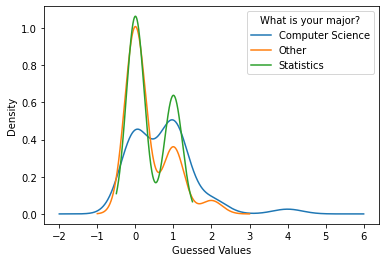

In [7]:
# TYPE YOUR CODE HERE.
def get_bins(min, max, bin_count):
  bin_size = (max-min)/bin_count
  bin_edge = min
  result = []
  while bin_edge < max:
    result.append(bin_edge)
    bin_edge += bin_size
  return result

ball = df_survey["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"]
major = df_survey["What is your major?"]
pd.crosstab(ball, major).plot(kind='kde').set(xlabel="Guessed Values")

**TYPE YOUR WRITTEN EXPLANATION HERE.**

I decided to plot the density of guesses to the major of the person who answered it. This graph shows that Statistics and Other majors made typically lower guesses than Computer Science majors, and that their range of guesses was narrower than that of Computer Scientists. 

I chose this plot type because it most clearly showed the pattern between majors, and since the data of interest (guesses) was quanititative with infinite possibilities rather than categorical.



## Question 4

Write and answer your own question using this data set.

What is the relationship between major and interests (pertaining to sports, videogames, and art)?

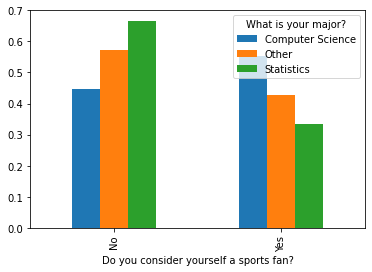

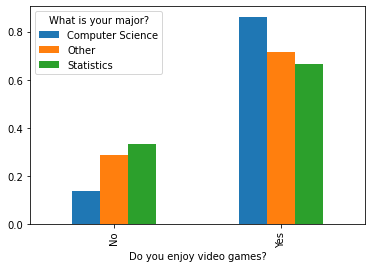

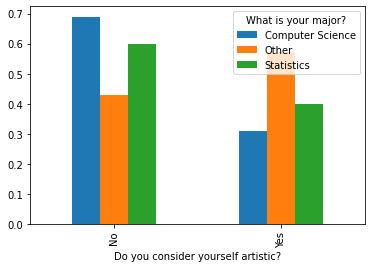

In [8]:
# TYPE YOUR CODE HERE.

df_survey
sports = df_survey["Do you consider yourself a sports fan?"]
videogames = df_survey["Do you enjoy video games?"]
art = df_survey["Do you consider yourself artistic?"]
major = df_survey["What is your major?"]#.value_counts(normalize=True)

# P(sports|major)
joint_sports_major = pd.crosstab(sports, major)#.plot(kind='bar', stacked=True)
sports_major = joint_sports_major.sum(axis=0)
cond_sports_major = joint_sports_major.divide(sports_major, axis=1)

# P(games|major)
joint_games_major = pd.crosstab(videogames, major, normalize=True)#.plot(kind='bar', stacked=True)
games_major = joint_games_major.sum(axis=0)
cond_games_major = joint_games_major.divide(games_major, axis=1)

# P(art|major)
joint_art_major = pd.crosstab(art, major, normalize=True) #.plot(kind='bar', stacked=True)
art_major = joint_games_major.sum(axis=0)
cond_art_major = joint_art_major.divide(art_major, axis=1)

cond_sports_major.plot(kind='bar')
cond_games_major.plot(kind='bar')
cond_art_major.plot(kind='bar')

**Sports:**

Overall, more Data 301 students are disinterested in sports than are, but only by a small amount. Statistics majors have the highest disinterest to interest ratio, followed by other majors, followed by Computer Science majors, who at a higher proportion are interested in sports than not.

**Video Games:**

Interest in video games appears nearly universally across the three surveyed majors. Interestingly, Computer Science majors have the highest proportion of video game enjoyers with nearly 5x more that do than don't. The interest : disinterst ratio is about 2:1 with both stats and other majors.

**Art:**

Overall, more Data 301 students consider themselves not artistic than artistic. Computer science majors have a 2:1 not-artistic to artistic ratio, while Statistics majors share the same sentiment with a less extreme diproportion. More Other majors consider themselves artistic than not.

The most interesting observation is how Other majors and Computer Science majors are inverted in interest with the exception of video-games, which Data 301 students nearly universally enjoy.